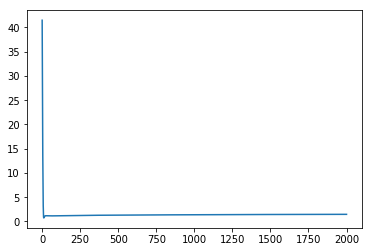

accCount 418
the accuracy is : 1.0


In [18]:
import numpy as np
from numpy import *
import pandas as pd
import csv
import matplotlib.pyplot as plt

"""
定义sigmoid函数
"""
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

""" 
classify用于计算样本点所述类别
"""
def classify(inX,weights):
    prediction = sigmoid(sum(inX * weights))
    #print ("prediction",prediction)
    if prediction>0.5:
        return 1
    else:
        return 0
    
def load_data():
    """
    读入数据集
    """ 
    train_x = pd.read_csv('./data/train_x.csv')
    test_x = pd.read_csv('./data/test_x.csv')
    test_y = pd.read_csv('./data/gender_submission.csv')
    train_y = pd.read_csv('./data/train_y.csv')
    return [train_x.values,train_y.values[:,1],test_x.values,test_y.values[:,1]]
    #return [test_x.values,test_y.values[:,1]]

def error_function(X,theta,Y):
    """
        计算损失函数
    """
    
    diff = X*theta -Y.T
    #print ('diff',diff.shape)
    t = diff.T*diff
    #return (1/(2*len(X)))*t
    return t/(2*len(X))


def gradAscent(dataMat,labelMat,alpha=0.0001,maxCycles=2000):
    """
    使用梯度上升算法，通过不断迭代改变参数的值来优化目标函数
    """
    m,n=shape(dataMat)
    weights=np.ones((n,1))
    errors=[]
    #循环迭代次数
    for k in range(maxCycles):
        #求当前的sigmoid函数预测概率
        h=sigmoid(dataMat*weights)
        #***********************************************
        #此处计算真实类别和预测类别的差值
        #对logistic回归函数的对数释然函数的参数项求偏导
        error=(labelMat.T-h)
        #更新权值参数                                                     
        weights=weights+alpha*dataMat.transpose()*error
        #***********************************************
        err = error_function(dataMat,weights,labelMat)
        #print("err",err)
        errors.append(float(err))
    return weights,errors

def test_acc(test_x,test_y,weights):
    """
        计算测试的内容
    """
    accCount = 0  #统计分类准确的个数
    numTest = len(test_x) #统计纳入分类统计的总数
    result = []
    for i in range(len(test_x)):  
        h = classify(test_x[i,:],weights)
        result.append(h)
        if h == test_y[0][i]:  #判断加载的每一个数据分类是否准确
            accCount = accCount + 1
    print ("accCount",accCount)
    accuracy = (float(accCount) / numTest)
    print('the accuracy is : %s' % accuracy) 
    return result

'''将预测结果写入到csv文件中'''
def storeResult():
    result = test_acc(test_x,test_y,trainWeights)
#     result = ''.join(result)
#     print(type(result))
    
    dataframe = pd.DataFrame(result)
    dataframe.to_csv('./data/Result.csv', sep=',')
    
    

train_x,train_y,test_x,test_y = load_data()
train_y = train_y[np.newaxis,:]
test_y = test_y[np.newaxis,:]


# print (train_x.shape,train_y.shape)
# print (test_x.shape,test_y.shape)
#print (type(train_y))
#trainWeights = StocGradAscent_improved_V1(np.mat(train_x),np.mat(train_y))
trainWeights,errors = gradAscent(np.mat(train_x),np.mat(train_y))

l = [i for i in range(1,len(errors)+1)]
#print (errors)
plt.plot(l,errors)
plt.show()

# print (trainWeights)

# test_acc(test_x,test_y,trainWeights)
storeResult()

